In [4]:
import pandas as pd
import numpy as np
import os
import glob
path="processed_gdelt2/"

pd.set_option('display.max_columns', 150)

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import ciso8601
from datetime import datetime
from dateutil import parser
import concurrent.futures
import time
import csv
import re

In [2]:
file_2021_10 = sorted(os.listdir('processed_gdelt2/'))[-10:]

In [3]:
files = glob.glob(os.path.join(path,"2020*.csv"))

In [4]:
headers = ['gkg_id', 'date', 'source', 'source_name', 'doc_id', 
        'themes', 'locations', 'persons', 'orgs', 
        'tone', 'pos', 'neg', 'polarity', 'ard', 'srd',
        'wc', 
        'lexicode_neg', 'lexicode_pos', # c3.*
        'MACROECONOMICS', 'ENERGY', 'FISHERIES', 
        'TRANSPORTATION', 'CRIME', 'SOCIAL_WELFARE',
        'HOUSING', 'FINANCE', 'DEFENCE', 'SSTC',
        'FOREIGN_TRADE', 'CIVIL_RIGHTS', 
        'INTL_AFFAIRS', 'GOVERNMENT_OPS',
        'LAND-WATER-MANAGEMENT', 'CULTURE',
        'PROV_LOCAL', 'INTERGOVERNMENTAL',
        'CONSTITUTIONAL_NATL_UNITY', 'ABORIGINAL',
        'RELIGION', 'HEALTHCARE', 'AGRICULTURE',
        'FORESTRY', 'LABOUR', 'IMMIGRATION',
        'EDUCATION', 'ENVIRONMENT',
        'finstab_pos', 'finstab_neg', 'finstab_neutral',
        'finsent_neg', 'finsent_pos', 'finsent_unc',
        'opin_neg', 'opin_pos',
        'sent_pos', 'sent_neg', 'sent_pol'
]

In [5]:
len(files)

32532

In [6]:
''' Tone--- (floating point number) This is the average “tone” of the document as a whole.
The score ranges from -100 (extremely negative) to +100 (extremely positive). Common
values range between -10 and +10, with 0 indicating neutral. '''

''' Positive Score--- (floating point number) This is the percentage of all words in the article
that were found to have a positive emotional connotation. Ranges from 0 to +100. '''

''' Negative Score--- (floating point number) This is the percentage of all words in the
article that were found to have a positive emotional connotation. Ranges from 0 to
+100. '''

''' Polarity--- (floating point number) This is the percentage of words that had matches in
the tonal dictionary as an indicator of how emotionally polarized or charged the text is.
If Polarity is high, but Tone is neutral, this suggests the text was highly emotionally
charged, but had roughly equivalent numbers of positively and negatively charged
emotional words. '''

def merge_csv():
    start = time.time()
#     df_each = (pd.read_csv(f,names=headers,header=None) for f in files)
#     df_merge = pd.concat(df_each, ignore_index=True)
#     df = df_merge.copy()
#     end = time.time()
#     print(f"Processing the data took : {round(end-start,2)} seconds")
    
    header_written = False
    ''' Pandas method takes a longer timer for merge and hence have made it in pure python to boost up'''

#     with open('gdelt.csv', 'w', newline="") as fout:
#         wout = csv.writer(fout, delimiter=',')
#         files = [x for x in glob.glob("processed_gdelt2/2020*.csv") if x != 'gdelt.csv']
#         for file in files:
#             print("processing {}".format(file))
#             with open(file) as fin:
#                 cr = csv.reader(fin,delimiter=',')
#                 if not header_written:
#                     wout.writerow(headers)
#                     header_written = True
#                 wout.writerows(cr)    
    
    df = pd.read_csv("Gdelt_2020.csv", nrows= 500000)
    end = time.time()
    print(f"Processing the data took : {round(end-start,2)} seconds")
      
    return df

def date_process(dff):
    start = time.time()
#     from datetime import datetime, timedelta
    dff['date'] = dff['date'].astype(str)
    print(dff['date'].dtype)
    i = 0
    dff['date'].dropna(inplace=True)
    
#     for word in dff['date']:
#         if not word.isdigit():

#             ind = dff[dff['date'] == 'word'].index
#             dff['date'].drop(ind, inplace=True)
    
#     dff['date'] = dff['date'].astype(str)




    for i,d in enumerate(dff['date']):
        
        
        dff['date'].iloc[i] = datetime(year=int(d[0:4]), month=int(d[4:6]), day=int(d[6:8]))
       
    end = time.time()
    print(f"Processing the datetime took : {round(end-start,2)} seconds")

    
    return dff



In [7]:
%%time

df = merge_csv()
print(df.shape)
dff = df.copy()
df1 = date_process(dff)
print(df1.shape)

Processing the data took : 13.21 seconds
(500000, 57)
object
Processing the datetime took : 1548.41 seconds
(500000, 57)
CPU times: user 25min 58s, sys: 2.25 s, total: 26min
Wall time: 26min 1s


In [67]:
print(df1['date'].min())
df1['date'].max()

2020-01-01 00:00:00


Timestamp('2020-12-31 00:00:00')

### Lockdown Feature inclusion


In [11]:
''' 2020/03/21 - Alert level 2
    2020/03/23  - Alert level 3
    2020/03/25  - Alert level 4
    2020/04/27 - 3
    2020/05/13 - 2
    2020/06/08 - 1
    2020/08/12 - A 3 & R 2
    2020/08/30 - 2
    2020/09/21 - A2 & R1
    2020/10/7  - 1
    2021/02/14 - A 3 R 2
    2021/02/17 - A 2 R 1 
    2021/02/28 - A 3 R 1
    2021/03/07 - A 2 R 1
    2021/03/12 - 1
    '''

def lockdown(df1):
    for date in df1['date']:
        if date < datetime(2020, 3, 23):
            df1['Lockdown'] = 'AL 2'
        elif date < datetime(2020, 3, 25):
            df1['Lockdown'] = 'AL 3'
        elif date < datetime(2020, 4, 27):
            df1['Lockdown'] = 'AL 4'
        elif date < datetime(2020, 5, 13):
            df1['Lockdown'] = 'AL 3'
        elif date < datetime(2020, 6, 8):
            df1['Lockdown'] = 'AL 2'
        elif date < datetime(2020, 8, 12):
            df1['Lockdown'] = 'AL 1'
        elif date< datetime(2020, 8, 30):
            df1['Lockdown'] = 'AKL-3 Rest-2'
        elif date < datetime(2020, 9, 21):
            df1['Lockdown'] = 'AL 2'
        elif date < datetime(2020, 10, 7):
            df1['Lockdown'] = 'AKL-2 Rest-1'
        elif date < datetime(2021, 2, 14):
            df1['Lockdown'] = 'AL 1'
        elif date < datetime(2021, 2, 17):
            df1['Lockdown'] = 'AKL-3 Rest-2'
        elif date < datetime(2021, 2, 28):
            df1['Lockdown'] = 'AKL-2 Rest-1'
        elif date < datetime(2021, 3, 7):
            df1['Lockdown'] = 'AKL-3 Rest-1'
        elif date < datetime(2021, 3, 12):
            df1['Lockdown'] = 'AKL-2 Rest-1'
        else:
            df1['Lockdown'] = 'AL 1'
            
    return df1


        

In [12]:
%%time
df1 = lockdown(df1)

CPU times: user 37min 30s, sys: 105 ms, total: 37min 30s
Wall time: 37min 30s


In [5]:
df1 = pd.read_feather('df1.ft')      # cleaned df

In [64]:
df1.head(10)

,gkg_id,date,source,source_name,doc_id,themes,locations,persons,orgs,tone,pos,neg,polarity,ard,srd,wc,lexicode_neg,lexicode_pos,MACROECONOMICS,ENERGY,FISHERIES,TRANSPORTATION,CRIME,SOCIAL_WELFARE,HOUSING,FINANCE,DEFENCE,SSTC,FOREIGN_TRADE,CIVIL_RIGHTS,INTL_AFFAIRS,GOVERNMENT_OPS,LAND-WATER-MANAGEMENT,CULTURE,PROV_LOCAL,INTERGOVERNMENTAL,CONSTITUTIONAL_NATL_UNITY,ABORIGINAL,RELIGION,HEALTHCARE,AGRICULTURE,FORESTRY,LABOUR,IMMIGRATION,EDUCATION,ENVIRONMENT,finstab_pos,finstab_neg,finstab_neutral,finsent_neg,finsent_pos,finsent_unc,opin_neg,opin_pos,sent_pos,sent_neg,sent_pol,Lockdown,Region
0,20201022071500-55,2020-10-22,1,pina.com.fj,http://www.pina.com.fj/index.php?p=pacnews&m=r...,TAX_FNCACT;TAX_FNCACT_COOK;TAX_WORLDLANGUAGES;...,1#Vanuatu#NH#NH#-16#167#NH;1#New Zealand#NZ#NZ...,pacific states;aiyaz sayed-khaiyum;mark brown,organisation of african;solutions for resilien...,-0.995025,3.482587,4.477612,7.960199,22.553897,1.160862,565.0,23.0,34.0,5.0,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,2.0,56.0,NaN,NaN,17.0,4.0,5.0,22.0,29.0,0.295137,0.251042,NaN,AL 2,New Zealand (General)
1,20201022071500-100,2020-10-22,1,medium.com,https://level.medium.com/5-countries-to-move-t...,TAX_ETHNICITY;TAX_ETHNICITY_BLACK;TAX_FNCACT;T...,1#Cuba#CU#CU#22#-79.5#CU;1#Germany#GM#GM#51.5#...,taika waititi,None,-2.415459,3.381643,5.797101,9.178744,21.739130,2.898551,185.0,13.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0,4.0,1.0,12.0,15.0,0.260621,0.274693,NaN,AL 2,New Zealand (General)
2,20201022071500-141,2020-10-22,1,scoop.co.nz,http://auckland.scoop.co.nz/2020/10/book-for-o...,TAX_FNCACT;TAX_FNCACT_AUTHOR;SCIENCE;TAX_FNCAC...,"4#Seatoun, New Zealand (General), New Zealand#...",linda cassells;profoundby patricia williams;pa...,ashton wylie charitable,5.555556,6.666667,1.111111,7.777778,18.333333,0.555556,495.0,13.0,47.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,4.0,18.0,3.0,21.0,45.0,0.292819,0.240270,NaN,AL 2,"Auckland,Wellington"
3,20201022071500-287,2020-10-22,1,standardmedia.co.ke,https://www.standardmedia.co.ke/farmkenya/arti...,TAX_ETHNICITY;TAX_ETHNICITY_ABORIGINES;ETH_IND...,1#Australia#AS#AS#-25#135#AS;1#Japan#JA#JA#36#...,george angus;tom hoult;john macadam;walter hil...,kenya macadamia nut company;macadamia industry...,-0.950119,0.950119,1.900238,2.850356,21.140143,0.712589,372.0,17.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,3.0,1.0,1.0,15.0,13.0,0.241457,0.267650,NaN,AL 2,New Zealand (General)
4,20201022071500-329,2020-10-22,1,pharmiweb.com,https://www.pharmiweb.com/press-release/2020-1...,None,1#Australia#AS#AS#-25#135#AS;1#Japan#JA#JA#36#...,abhishek budholiya,guangzhou wanhe plastic materials co ltd;gc ae...,-2.601523,1.840102,4.441624,6.281726,24.365482,0.380711,1434.0,77.0,68.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,2.0,70.0,NaN,NaN,9.0,26.0,4.0,30.0,46.0,0.234982,0.210746,NaN,AL 2,New Zealand (General)
5,20201022071500-348,2020-10-22,1,scoop.co.nz,http://community.scoop.co.nz/2020/10/healthcar...,EDUCATION;SOC_POINTSOFINTEREST;SOC_POINTSOFINT...,"5#Auckland, Auckland, New Zealand#NZ#NZE7#-36....",isaac cleland;rau whenua;wendy kerr,university research category;university of auc...,4.827586,6.620690,1.793103,8.413793,22.620690,0.689655,662.0,22.0,65.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,9.0,NaN,35.0,NaN,NaN,22.0,32.0,6.0,30.0,52.0,0.258795,0.259326,NaN,AL 2,Auckland
6,20201022071500-352,2020-10-22,1,scoop.co.nz,http://auckland.scoop.co.nz/2020/10/hotspot-wa...,USPEC_POLICY1;WATER_SECURITY;NATURAL_DISASTER;...,"4#Hawke Bay, New Zealand (General), New Zealan...",None,None,-1.516

### Region Wise Analysis

In [10]:
regions = [
    "Northland", "Auckland", "Waikato", "Bay of Plenty", "Gisborne", 
    "Hawke's Bay", "Taranaki", "Manawatu-Whanganui", "Wellington", "Tasman",
    "Nelson", "Marlborough", "West Coast", "Canterbury", "Otago", "Southland"
]

In [11]:
df1['Region'] = df1['locations'].str.findall(r"|".join(regions)).apply(", ".join)

In [12]:
def region(region):
    
    region = region.split(',')
    region = [region.replace(' ', '') for region in region]
#     region = list(filter(lambda x: x.strip(), region))
    region = list(set(region))
    region = ["New Zealand (General)" if region == '' else region for region in region]
    
    return region

df1['Region'] = df1['Region'].apply(lambda x: region(x))

# list to str

df1['Region'] = df1['Region'].agg(lambda x: ','.join(map(str, x)))

In [ ]:
test = ','.join(df1['Region'])
test = test.split(',')
d = Counter(test)
df_Region = pd.DataFrame.from_dict(d, orient='index').reset_index()
df_Region.columns = {'Region', 'Count'}
df_Region.sort_values(by = 'Count', ascending=False, inplace=True)

Text(0.5, 1.0, 'Top News Region wise in 2020')

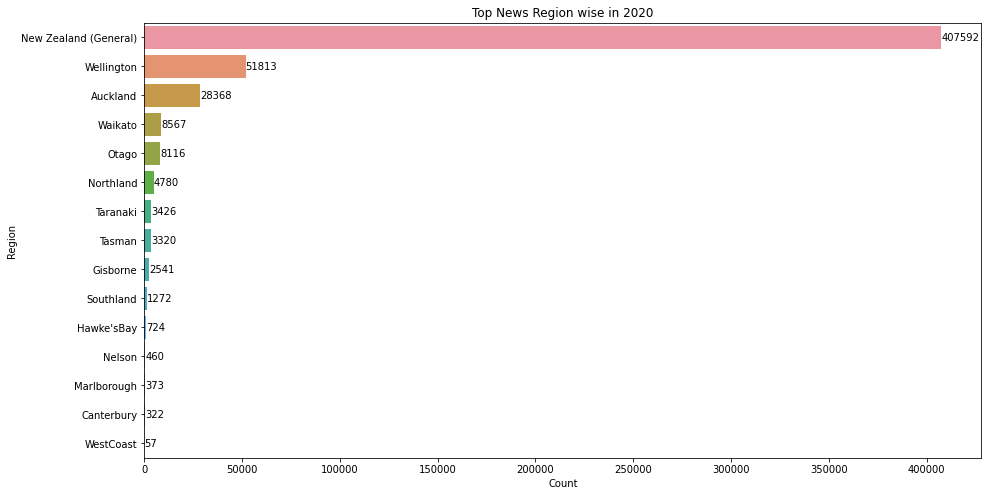

In [58]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x='Count' ,y='Region',data=df_Region)
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
plt.title("Top News Region wise in 2020")
# plt.xlabel("No")

In [18]:
# df1.to_feather('df1.ft')

In [66]:
df1[df1['date'] == datetime(2020, 5, 26)]['tone'].mean()

-1.0424941671824781

### scraping Hedonometer events api

In [59]:


def hedono_api():
    response = requests.get("http://hedonometer.org/api/v1/events/?format=json&happs__timeseries__title=en_all&happs__date__gte=2019-11-01")

    print(response.status_code)

    x = response.json()
    x = json.dumps(x)
    json_parsed = json.loads(x)

    obj = json_parsed['objects']

    f = csv.writer(open("events.csv", "w"))

    h = ["date","happiness","shorter"]

    f.writerow(h)

    for x in obj:
        f.writerow([x['happs']['date'],
                    x['happs']['happiness'],
                    x['shorter']])
        
    

#### S3 integration

In [60]:
import boto3

def upload_to_s3(filename, key):
    session = boto3.Session(profile_name='kandavar')
    dev_s3_client = session.client('s3')
    bucket_name = 'statsnz-covid-kandavar'
    
    dev_s3_client.put_object(Body=open(filename, 'rb'), Bucket = bucket_name, Key = filename)
    

def read_from_s3():
    
    session = boto3.Session(profile_name='kandavar')
    dev_s3_client = session.client('s3')
    bucket_name = 'statsnz-covid-kandavar'
    
    
    obj = dev_s3_client.get_object(Bucket = bucket_name, Key = filename)
    d = pd.read_csv(obj['Body'])

### Plots 

Text(0.5, 1.0, 'Top News Channel in 2020')

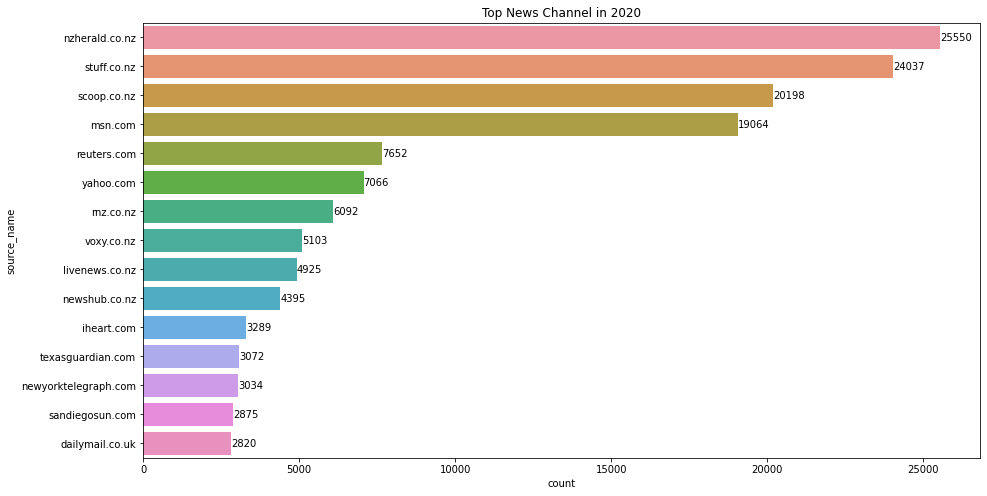

In [62]:
plt.figure(figsize=(15,8))
ax=sns.countplot(y='source_name',data=df1, order=df1.source_name.value_counts().iloc[:15].index)
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
plt.title("Top News Channel in 2020")
# plt.xlabel("No")

<AxesSubplot:xlabel='date', ylabel='tone'>

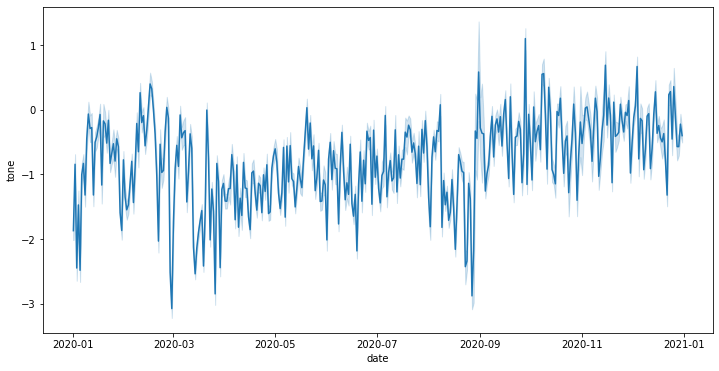

In [65]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='tone',data=df1)